In [1]:
# ================================================================
# demo.py —— Student Lévy FFT density
# ================================================================
import importlib, numpy as np, matplotlib.pyplot as plt
from scipy.stats import cauchy

# local modules
import cf, windows, inversion, metrics, plotting
for m in (cf, windows, inversion, metrics, plotting):
    importlib.reload(m)

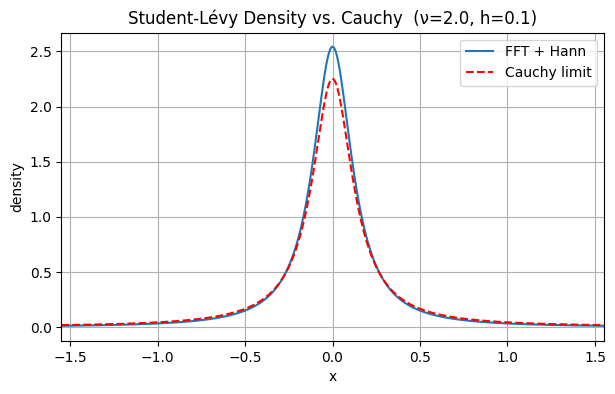

∫ f dx ≈ 1.000000


In [5]:
# ----------------------------------------------------------------
# 1. FFT density & Cauchy limit (ν=1, h=0.01)
# ----------------------------------------------------------------
nu, h = 2.0, 0.5
x, f  = inversion.density_fft(h, nu, n_grid=2**16, window='hann')

scale = h * np.sqrt(nu)
plotting.compare_with_limit(x, f,
                            lambda z: cauchy.pdf(z, scale=scale),
                            lbl_fft='FFT + Hann', lbl_lim='Cauchy limit')
plt.xlim(*metrics.auto_xlim(x, f, thresh=0.005))
plt.title(f"Student-Lévy Density vs. Cauchy  (ν={nu}, h={h})")
plt.show()

dx = x[1] - x[0]
print(f"∫ f dx ≈ {f.sum() * dx:.6f}")


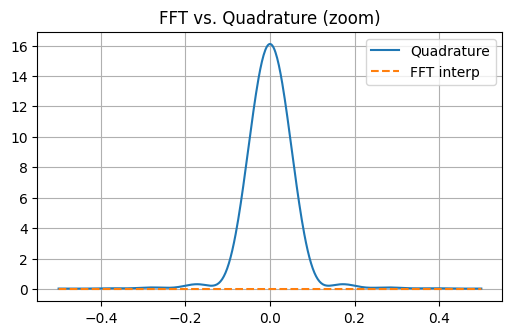

Max |FFT - Quad| on zoom slice: 16.096409134291527


In [4]:
# ----------------------------------------------------------------
# 2. Quadrature spot-check on zoomed range
# ----------------------------------------------------------------
x_zoom = np.linspace(-0.5, 0.5, 500)
f_quad = inversion.density_quad(h, nu, x_zoom,
                                window='hann', U=60, N_u=4097)

plt.figure(figsize=(6,3.5))
plt.plot(x_zoom, f_quad, label='Quadrature')
plt.plot(x_zoom, np.interp(x_zoom, x, f), '--', label='FFT interp')
plt.legend(); plt.grid(True); plt.title("FFT vs. Quadrature (zoom)"); plt.show()

print("Max |FFT - Quad| on zoom slice:",
      np.max(np.abs(f_quad - np.interp(x_zoom, x, f))))